<h1 style="font-size:3rem;color:purple;">Homework 1 CISC 351</h1>


This is my first time using jupyter notebooks so bear with me :)
Name: Leo Toueg
Student#: 20062982

In [1935]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

airbnb = pd.read_csv('listings.csv')



In [1936]:
airbnb.head()
airbnb.tail()
#Looking at first and last rows of data to see what we are dealing with.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
12328,52759460,Crazy view and luxe,98954248,Chaaba,NaN,Ville-Marie,45.496378,-73.572487,Entire home/apt,190,10,0,NaN,NaN,4,53,0,NaN
12329,52760905,Cozy apartment in plateau- Montreal,21801433,Ghita,NaN,Le Plateau-Mont-Royal,45.530676,-73.568063,Entire home/apt,75,2,0,NaN,NaN,1,336,0,NaN
12330,52762087,"4339Cozy BIG Private Room in PLATEAU 75""TV+NET...",373054767,Mahmod,NaN,Le Plateau-Mont-Royal,45.538297,-73.567094,Private room,85,1,0,NaN,NaN,8,88,0,NaN
12331,52762449,Spacious outremont charm,54427037,John,NaN,Outremont,45.518886,-73.613011,Entire home/apt,500,2,0,NaN,NaN,1,167,0,NaN
12332,52773199,"4339 75""TV+NETFLIX Cozy BIG Private Room DOWNTOWN",373054767,Mahmod,NaN,Le Plateau-Mont-Royal,45.536311,-73.566679,Private room,95,1,0,NaN,NaN,8,363,0,NaN


As we can see, we have 12332(+1) rows of data.

We can get a litte bit of information on the data by using .info method:

In [1937]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12333 non-null  int64  
 1   name                            12328 non-null  object 
 2   host_id                         12333 non-null  int64  
 3   host_name                       12331 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12333 non-null  object 
 6   latitude                        12333 non-null  float64
 7   longitude                       12333 non-null  float64
 8   room_type                       12333 non-null  object 
 9   price                           12333 non-null  int64  
 10  minimum_nights                  12333 non-null  int64  
 11  number_of_reviews               12333 non-null  int64  
 12  last_review                     

<h1 style="font-size:10rem;color:purple;">Q1.Summary Statistics:</h1>

I will first look at the box plot to see visually what the distribution might look like.

#Summary statistic 1:

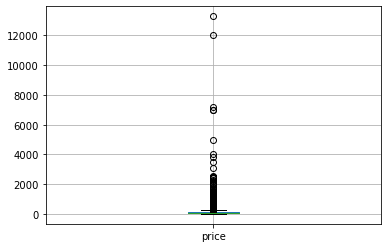

In [1938]:
plot1 = airbnb.boxplot(column='price')


As we can see, the graph is squished. Since at least 75% of the prices are lower than 130(see below), I will adjust
this graph by looking at all prices under 600 dollars(which still represents most our data). I will use a violin plot
to do this, in order to see both the box plot and the distribution at the same time.

#Summary statistic 2:


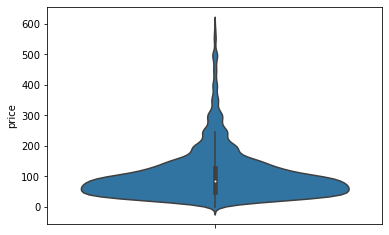

In [1939]:
under2000 = airbnb[airbnb["price"] < 600]
sns.violinplot(y=under2000["price"])
plt.show()

The last summary statistic is the actual data values of the box plot (quantiles, mean, std, etc...) This gives us
an actual idea of the values and the prices ranges we are interested in, and more notably a better understanding of
the variance in our data.

#Summary statistic 3

In [1940]:
airbnb['price'].describe()
#note that this pertains to all the data, not just all listings < 600$

count    12333.000000
mean       125.621747
std        261.253110
min          0.000000
25%         52.000000
50%         85.000000
75%        130.000000
max      13294.000000
Name: price, dtype: float64

Since there are apparently rows where the price is 0, we will remove these. We can now have more accurate statistics.
This can be done as follows:

In [1941]:
print((airbnb['price'] == 0).sum())
#checks how many rows have a price of 0

airbnb.drop(airbnb[airbnb['price'] <= 0].index, inplace = True)
airbnb['price'].describe()

4


count    12329.000000
mean       125.662503
std        261.285689
min         12.000000
25%         52.000000
50%         85.000000
75%        130.000000
max      13294.000000
Name: price, dtype: float64

I decided to add one more statistic to see what the 95th percentile of the prices is, in order to better understand
the exact variance of the data:


In [1942]:
print(airbnb.price.quantile(0.9))
print("is the 90% percentile")

print(airbnb.price.quantile(0.05))
print("is the 5% percentile")

#Summary statistic 4

214.0
is the 90% percentile
26.0
is the 5% percentile


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

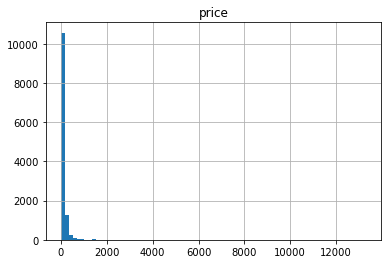

In [1943]:
#In order to show this a little better, here is a histogram
airbnb.hist(column="price",bins=80)

Statistics Summary:
-The pricing data is skewed and has a bit of a tail to the right side.
-Parametric tests could be effective if data is normalised, however Non-parametric tests would be better here.
-We have gotten a lot of insight on the price ranges for our data set by looking at some elementary statistics.
-Prices are mostly between roughly 40 and 200, with a couple outliers
-Prices go up to 13294 dollars.
-Only 5% of prices are below 2
-Only 10% of prices are over 214.
-The mean of prices is 125.
-the 1st and 3rd quartiles are at 52 and 130 dollars, respectively.

<h1 style="font-size:10rem;color:purple;">Q2.Statistical Tests involving room type and list price:</h1>

In order to see how many room types there are, we can use pandas' .nunique() and unique as follows:

In [1944]:
n = airbnb.room_type.nunique()
print(n)
print("types of rooms:")
pd.unique(airbnb.room_type)

4
types of rooms:


array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

As we can see, there are 4 different room_types. We will encode these with integers, and see how many of each our data contains,
as follows:

In [1945]:
room_encoding = {'Shared room': 0, 'Private room' : 1, 'Entire home/apt' : 2, 'Hotel room' : 3 }
airbnb['room_type'] = airbnb['room_type'].apply(lambda x: room_encoding[x])
#print(airbnb.room_type)
print(airbnb['room_type'].value_counts())

2    9109
1    3087
0      97
3      36
Name: room_type, dtype: int64


Since there are 4 types of Rooms, I will perform pairwise two sampled t-tests in order to compare the means of each type of room.
I chose to do pairwise two sampled t-tests since each listing belongs to one room_type. Further, since there are only 4 room types,
I was curious to see if there were any 2-way similarities in the means of price.

Alternative test:

I could have equally chosen to do ANOVA to test all room types at once, but I did not have enough time to also try that.
where:
-H0: The means of the prices of each type of room is the same
-H1: The means of the prices in each type of room is not equal [ex: µ(Hotel) != µ(Private Room)…]



Null Hypothesis: The mean prices for each pairs of type of room is equal.
Alternative hypothesis: The group means are different, thus the room type affects price.

In [1946]:
import statistics
#isolating each room type and its price
class_0 = airbnb[airbnb["room_type"].isin([0, 0])]
class0 = class_0["price"].tolist()
#mean of each room type
print("mean of class0: "+ str(statistics.mean(class0)))

class_1 = airbnb[airbnb["room_type"].isin([1, 1])]
class1 = class_1["price"].tolist()
print("mean of class1: "+ str(statistics.mean(class1)))

class_2 = airbnb[airbnb["room_type"].isin([2, 2])]
class2 = class_2["price"].tolist()
print("mean of class2: "+ str(statistics.mean(class2)))

class_3 = airbnb[airbnb["room_type"].isin([3, 3])]
class3 = class_3["price"].tolist()
print("mean of class3: "+ str(statistics.mean(class3)))


#Here is where I do T-test using ttest_ind()
print("T-test between room type 0 and 1")
ttest,pval01 = ttest_ind(class0,class1)
#print pvalue
print("p-value",pval01)
#Acceptance critera
if pval01 <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

print("T-test between room type 1 and 2")
ttest,pval12 = ttest_ind(class1,class2)
print("p-value",pval12)
if pval12 <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

print("T-test between room type 2 and 3")
ttest,pval23 = ttest_ind(class2,class3)
print("p-value",pval23)
if pval23 <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

print("T-test between room type 0 and 2")
ttest,pval02 = ttest_ind(class0,class2)
print("p-value",pval02)
if pval02 <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

print("T-test between room type 0 and 3")
ttest,pval03 = ttest_ind(class0,class3)
print("p-value",pval03)
if pval03 <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

print("T-test between room type 1 and 3")
ttest,pval13 = ttest_ind(class1,class3)
print("p-value",pval13)
if pval13 <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

mean of class0: 96.55670103092784
mean of class1: 75.59345643019113
mean of class2: 142.67350971566583
mean of class3: 193.25
T-test between room type 0 and 1
p-value 0.49868234491126406
we accept null hypothesis
T-test between room type 1 and 2
p-value 4.20644375424099e-35
we reject null hypothesis
T-test between room type 2 and 3
p-value 0.2143165860176338
we accept null hypothesis
T-test between room type 0 and 2
p-value 0.06500927776149447
we accept null hypothesis
T-test between room type 0 and 3
p-value 0.05195301179296582
we accept null hypothesis
T-test between room type 1 and 3
p-value 0.019038890784905126
we reject null hypothesis


In conclusion:
The differences in mean price between :
-Entire home/apt and Private room = statistically insignificant
-Entire home/apt and Shared room = statistically insignificant
-Entire home/apt and Hotel room = statistically insignificant
-Private room and Shared room = statistically significant
-Private room and Hotel room = statistically significant
-Shared room and Hotel room = statistically insignificant

<h1 style="font-size:10rem;color:purple;">Q3.Statistical Tests involving neighborhood and list price:</h1>

First we need to encode the neighborhoods, as they are currently strings. This can be done using sklearn and more specifically
LabelEncoder. This will transform the strings into integers, for easier analysis.

In [1947]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
airbnb['neighbourhood']=le.fit_transform(airbnb['neighbourhood'])



I Also want to see how many AirBnBs are in each neighborhood:

In [1948]:
nbhdata = airbnb[['neighbourhood', 'price']]
print(nbhdata['neighbourhood'].value_counts())

29    3530
13    3094
24    1048
5      937
14     859
15     638
30     617
28     273
0      266
25     148
20     128
11     113
12      89
18      61
23      58
31      58
26      55
4       46
21      46
16      44
1       42
22      39
7       33
6       29
3       25
10      11
8       10
19       9
9        8
27       7
2        6
17       2
Name: neighbourhood, dtype: int64


As we can see, there are a lot in neighborhoods 29 and 13. Since these both have a lot of data entries(3000+), I thought it would
be interesting to perform an unpaired T-test to determine whether the price mean for each neighborhood is the same.
Null Hypothesis: The mean price of an air bnb in neighborhoods 29 and 13 are the same


In [1949]:

import statistics
#isolating each neighborhood and its price
n29 = airbnb[airbnb["neighbourhood"].isin([29, 29])]
nbh29 = n29["price"].tolist()
#mean of neighbourhood 29
print("mean price of neighbourhood 29: "+ str(statistics.mean(nbh29)))
print("std dev of neighbourhood 29: "+ str(np.std(nbh29)))


n13 = airbnb[airbnb["neighbourhood"].isin([13, 13])]
nbh13 = n13["price"].tolist()
#mean of neighbourhood 13
print("mean price of neighbourhood 13: "+ str(statistics.mean(nbh13)))
print("std dev of neighbourhood 13: "+ str(np.std(nbh13)))


mean price of neighbourhood 29: 146.14504249291784
std dev of neighbourhood 29: 224.662203930382
mean price of neighbourhood 13: 130.49935358758887
std dev of neighbourhood 13: 301.8318899960484


As we can see, the mean price of each neighborhood is very similar, and the standard deviation is relatively similar too.
It is time to do the T-test as follows:

In [1950]:
#Here is where I do T-test using ttest_ind()
print("T-test between neighbourhoods 29 and 13")
ttest,pval = ttest_ind(nbh29,nbh13)
#print pvalue
print("p-value",pval)
#Acceptance critera
if pval01 <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

T-test between neighbourhoods 29 and 13
p-value 0.015964748640661428
we accept null hypothesis


The reason I chose this test is because we are looking at continous data, and comparing the difference in means. Further, since there are only 2 groups and I make the parametric assumptions (Independent unbiased samples, normally distributed data, equal variances) it makes sense to use a unpaired T-test. If I had not made such assumptions, I would've done either a Mann-Whiskey U or Wilcoxon Rank sums test.

<h1 style="font-size:10rem;color:purple;">Q4.Correlation Tests:</h1>

In order to get an idea of what attributes might be correlated, I used a correlation matrix to see what attributes
might be correlated:

Source: https://amanjaiman.github.io/nyc-airbnb-data/
Origin: Link provided by instructor

In [1951]:
airbnb.drop('neighbourhood_group', axis=1, inplace=True)
airbnb.corr().style.background_gradient(cmap='coolwarm')

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.538846,0.062639,-0.077990,-0.002347,0.015449,0.011416,-0.033195,-0.286468,0.302394,0.191880,0.108809,0.140086
host_id,0.538846,1.000000,0.074132,-0.074778,-0.003847,-0.027497,0.031480,-0.038473,-0.111821,0.272322,0.064692,0.093617,0.156545
neighbourhood,0.062639,0.074132,1.000000,0.077239,0.299602,0.077193,0.023939,-0.003629,0.009181,0.071792,0.110033,0.007978,0.043560
latitude,-0.077990,-0.074778,0.077239,1.000000,0.277961,-0.042261,-0.027551,-0.023865,-0.003430,-0.068923,-0.084978,-0.053836,-0.046217
longitude,-0.002347,-0.003847,0.299602,0.277961,1.000000,0.052237,0.020861,-0.001151,0.035878,0.067441,0.086395,-0.048071,0.048328
room_type,0.015449,-0.027497,0.077193,-0.042261,0.052237,1.000000,0.108764,0.016169,0.100238,0.099624,0.135131,0.048311,0.124788
price,0.011416,0.031480,0.023939,-0.027551,0.020861,0.108764,1.000000,0.007285,0.010172,0.035321,-0.002265,0.088676,0.007139
minimum_nights,-0.033195,-0.038473,-0.003629,-0.023865,-0.001151,0.016169,0.007285,1.000000,-0.021293,-0.033116,0.008103,0.047591,-0.038410
number_of_reviews,-0.286468,-0.111821,0.009181,-0.003430,0.035878,0.100238,0.010172,-0.021293,1.000000,0.370920,-0.034781,0.078548,0.502698
reviews_per_month,0.302394,0.272322,0.071792,-0.068923,0.067441,0.099624,0.035321,-0.033116,0.370920,1.000000,0.110246,0.133684,0.588025


As we can see, no two variables stand out as having large correlation. One notable one, which I will try first is the
correlation between the number of reviews per month and the number of reviews in the last 12 months, which appears
to have the strongest correlation out of the pairs.

Since we are not entirely sure of the underlying data distributions, I will try both Pearson and Spearman correlation tests.

In [1952]:
first = airbnb[['reviews_per_month', 'number_of_reviews_ltm']]
#Pearson test using parametric assumptions
print("Pearson Correlation: ")
airbnb.reviews_per_month.corr(airbnb.number_of_reviews_ltm, method="pearson")

Pearson Correlation: 


0.5880252886306321

Now we will try the Spearman correlation, which doesn't use parametric assumptions:

In [1953]:
first = airbnb[['reviews_per_month', 'number_of_reviews_ltm']]
#Spearman test using no underlying distribution assumptions
print("Spearman Correlation: ")
airbnb.reviews_per_month.corr(airbnb.number_of_reviews_ltm, method="spearman")

Spearman Correlation: 


0.7479225836359327

Since this is closer to 1 than -1, we can conclude that there is a direct correlation between the number of reviews per months and the
number of reviews in the last 12 months. Intuitively, this makes sense, however this result is not very interesting. For this reason
I chose to do a third test, to see if two variables might be more related than they seem. I am interested in seeing if the number of reviews affect the price, as intuitively I feel like the more reviews a place has the more the owner would charge.


In [1954]:
first = airbnb[['number_of_reviews', 'price']]
#Spearman test using no underlying distribution assumptions
print("Spearman Correlation: ")
airbnb.number_of_reviews.corr(airbnb.price, method="spearman")

Spearman Correlation: 


0.0986329056962256

As it turns out, I seem to have been mistaken in my assumption. As the result is very close to 0, nothing suggests that there might be
a relationship between the number of reviews and the price of an AirBnb.
I hope you enjoyed :)
Note: this was my first time using Dataspell and jupyter notebooks so it took me a long time to setup my environment. For this
reason I did not go thoroughly check all the statistical assumptions and I chose statistical tests for which I made parametric
assumptions for the most part.